In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('salaries.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'salaries.csv'

In [ ]:
inputs = df.drop('salary_more_then_100k',axis='columns')
target = df['salary_more_then_100k']

In [ ]:
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le_company = LabelEncoder() #The LabelEncoder is used to convert categorical labels into numerical values
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [ ]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_company.fit_transform(inputs['job'])
inputs['degree_n'] = le_company.fit_transform(inputs['degree'])
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [ ]:
inputs_n = inputs.drop(['company','job','degree'],axis='columns')
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [ ]:
from sklearn import tree

In [ ]:
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [ ]:
model.score(inputs_n,target)

1.0

In [ ]:
z = model.predict([[2,0,0]])
z

if z == 1:
    print("Employee salary is going to be more than 100k")
else:
     print("Employee salary is not more than 100k")   

Employee salary is going to be more than 100k


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Excercise

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Datasets/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
survived = df[df.Survived==1]
survived.shape

(342, 12)

In [4]:
survived = df[df.Survived==0]
survived.shape

(549, 12)

In [5]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [6]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [7]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [8]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [9]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [10]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [11]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [14]:
len(X_train)

712

In [15]:
len(y_train)

712

In [19]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
model = tree.DecisionTreeClassifier()
clf = RandomForestClassifier(n_estimators=200,random_state=120,criterion='gini')

In [20]:
model.fit(X_train,y_train)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=120)

In [30]:
# Compute the cost-complexity pruning path
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# # Plot the pruning path
# fig, ax = plt.subplots()
# ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
# ax.set_xlabel("effective alpha")
# ax.set_ylabel("total impurity of leaves")
# ax.set_title("Total Impurity vs Effective Alpha for training set")

# # Find the optimal value for ccp_alpha
# optimal_ccp_alpha = ccp_alphas[np.argmin(impurities)]

# # Set the ccp_alpha parameter
# model.set_ccp_alpha(optimal_ccp_alpha)

# Re-fit the tree
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
# model.score(X_test,y_test)
clf.score(X_test,y_test)

0.8268156424581006

In [38]:
model.score(X_test,y_test)

0.8156424581005587

In [26]:
model.predict([[3,1,24,7.7958]])

c:\Users\MOHIT RANJAN\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [ ]:
model.predict([[1,2,38,71.2833]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

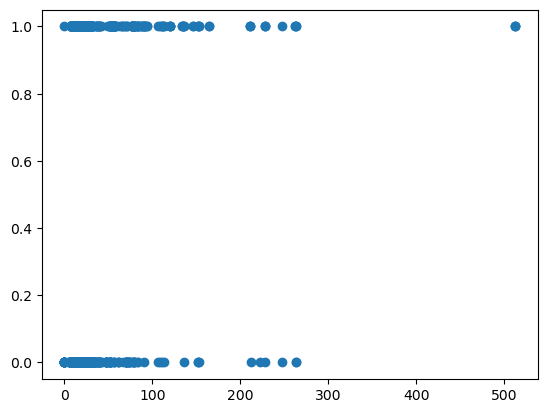

In [ ]:
plt.scatter(df['Fare'], df['Survived'])
